In [21]:
import keras
from keras import layers,models,utils,optimizers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print("train data:")
train_data=utils.image_dataset_from_directory(
    'new_dataset2/train',
    image_size=(48,48),
    batch_size=128,
    label_mode="categorical"
)

print("val data:")
val_data=utils.image_dataset_from_directory(
    'new_dataset2/validation',
    image_size=(48,48),
    batch_size=128,
    label_mode="categorical"
)

print("test data:")
test_data=utils.image_dataset_from_directory(
    'new_dataset2/test',
    image_size=(48,48),
    batch_size=128,
    label_mode="categorical"
)

train data:
Found 33870 files belonging to 5 classes.
val data:
Found 1135 files belonging to 5 classes.
test data:
Found 6130 files belonging to 5 classes.


data_batch shape: (128, 48, 48, 3)


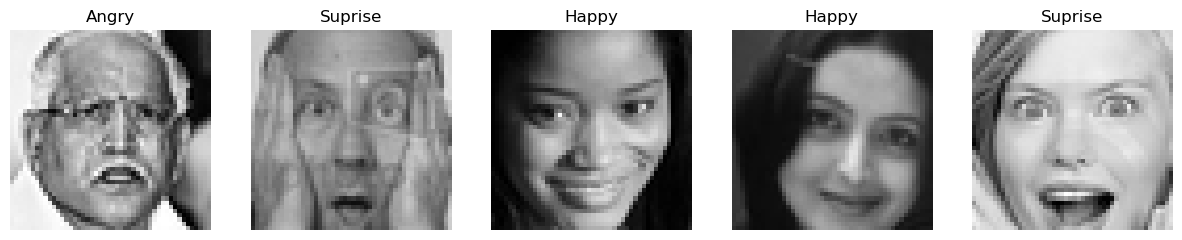

In [30]:
a,f,h,r,s=0,1,2,3,4
for data_batch,label_batch in train_data:
    print("data_batch shape:",data_batch.shape)
    fig,ax=plt.subplots(1,5,figsize=(15,15))
    for i,axe in enumerate(ax):
        title=''
        label=np.argmax(label_batch[i])
        if label==a:
            title='Angry'
        elif label==f:
            title='Fear'
        elif label==h:
            title='Happy'
        elif label==r:
            title='Sad'
        else:
            title='Suprise'
        axe.imshow(data_batch[i].numpy().astype('uint8'))
        axe.set_axis_off()
        axe.set_title(title)
    break
plt.show()


In [33]:
input=keras.Input(shape=(48,48,3))
x=layers.Rescaling(1./255)(input)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu',padding='same')(x)
x=layers.Flatten()(x)
output=layers.Dense(5,activation='softmax')(x)
model=keras.Model(inputs=input,outputs=output)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │        11,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 990,021 (3.78 MB)

 Trainable params: 990,021 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_data,epochs=30,validation_data=val_data)

Epoch 1/30


265/265 ━━━━━━━━━━━━━━━━━━━━ 47s 176ms/step - accuracy: 0.2610 - loss: 1.5852 - val_accuracy: 0.3145 - val_loss: 1.5404
Epoch 2/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 51s 191ms/step - accuracy: 0.3595 - loss: 1.4694 - val_accuracy: 0.4282 - val_loss: 1.3859
Epoch 3/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 39s 146ms/step - accuracy: 0.4461 - loss: 1.3202 - val_accuracy: 0.4220 - val_loss: 1.3042
Epoch 4/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.5012 - loss: 1.2085 - val_accuracy: 0.5048 - val_loss: 1.2084
Epoch 5/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 45s 170ms/step - accuracy: 0.5505 - loss: 1.1115 - val_accuracy: 0.5410 - val_loss: 1.1383
Epoch 6/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.5891 - loss: 1.0211 - val_accuracy: 0.5515 - val_loss: 1.1073
Epoch 7/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 37s 139ms/step - accuracy: 0.6329 - loss: 0.9228 - val_accuracy: 0.5665 - val_loss: 1.1333
Epoch 8/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.6823 - loss: 0.8178 - val

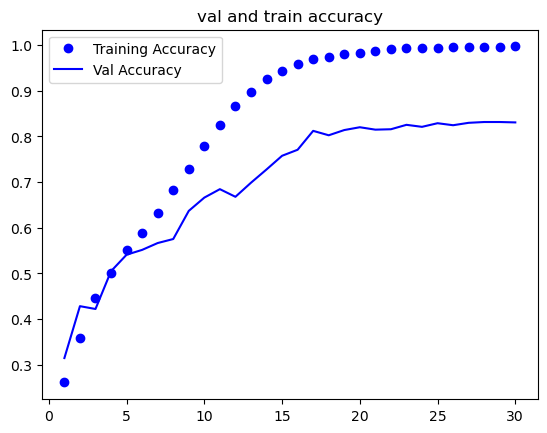

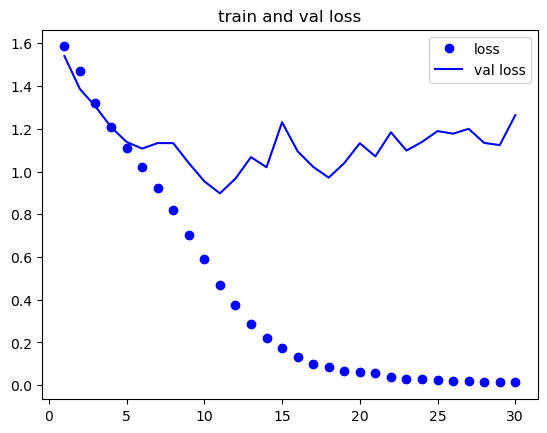

In [35]:
accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Val Accuracy")
plt.title("val and train accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label="loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.title("train and val loss")
plt.legend()
plt.show()